<a href="https://colab.research.google.com/github/jrohn34/Wine-Data-Set/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Wine Data Set

In [3]:
fname_wine = '/content/drive/MyDrive/Colab Notebooks/wines_SPA.csv'

In [4]:
df_wine = pd.read_csv(fname_wine)

In [5]:
df_wine.info()
df_wine.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


1. Source of Data: fedesoriano. (April 2022). Spanish Wine Quality Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset

2. Brief description of data: The dataset contains 7500 different types of red wines from Spain with 11 features that describe their price, rating, and even some flavor description.

3. What is the target: To determine the quality of the best wines

4. What does one row represent: A row represents a wine bottle

5. Is this a classification or regression problem: It is a classification problem

6. How many features does the data have: 11

7. How many rows are in the dataset: 7500

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset: To figure out the best wines because taste is subjective.

# Clean Data

In [6]:
X = df_wine.drop('rating', axis=1)
y = df_wine['rating']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
duplicates = df_wine.duplicated()
print("Number of duplicates:", duplicates.sum())
df_wine.drop_duplicates(inplace=True)   #inspected all of the duplicates and dropped them all

Number of duplicates: 5452


In [9]:
df_wine['year'] = pd.to_numeric(df_wine['year'], errors='coerce')
median_year = df_wine['year'].median() # Calculate the mode of year
df_wine['year'].fillna(median_year, inplace = True)
df_wine['year'] = df_wine['year'].astype(int)

In [10]:
mode_type = df_wine['type'].mode()[0]  # Calculate the mode of type
df_wine['type'].fillna(mode_type, inplace=True)

In [11]:
df_wine['body'] = pd.to_numeric(df_wine['body'], errors='coerce')
mean_body = df_wine['body'].mean()  # Calculate the mean of body
df_wine['body'].fillna(mean_body, inplace=True)

In [12]:
df_wine['acidity'] = pd.to_numeric(df_wine['acidity'], errors='coerce')
mean_acidity = df_wine['acidity'].mean()  # Calculate the mean of acidity
df_wine['acidity'].fillna(mean_acidity, inplace=True)

In [13]:
categorical_columns = ['winery','wine','year','country','region','type']

for col in categorical_columns:
    print(df_wine[col].value_counts())  #looping through categorical columns to see if there is any inconsistent values

Vega Sicilia                            97
Alvaro Palacios                         48
Artadi                                  43
La Rioja Alta                           36
Marques de Murrieta                     33
                                        ..
Valdelosfrailes                          1
Briego                                   1
Guillem Carol - Cellers Carol Valles     1
Particular                               1
Binigrau                                 1
Name: winery, Length: 480, dtype: int64
Tinto                                                 56
Unico                                                 41
Valbuena 5o                                           32
Reserva                                               31
Priorat                                               26
                                                      ..
San Valentin Parellada                                 1
Silvanus Edicion Limitada Ribera del Duero             1
El Jardin de las Iguales Vinedo

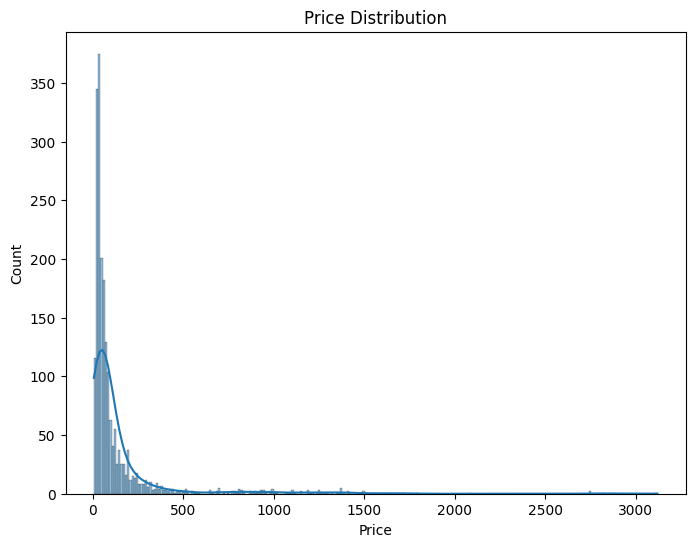

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df_wine['price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

Outliers: Cannot determine

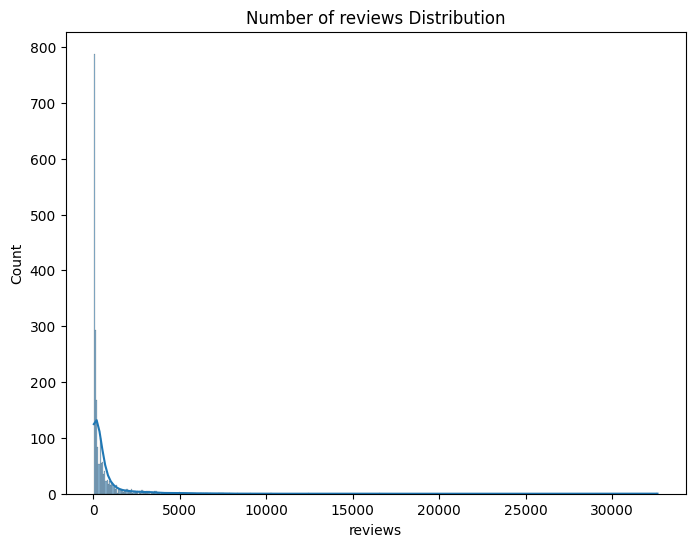

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(df_wine['num_reviews'], kde=True)
plt.title('Number of reviews Distribution')
plt.xlabel('reviews')
plt.ylabel('Count')
plt.show()

Outliers: Cannot determine

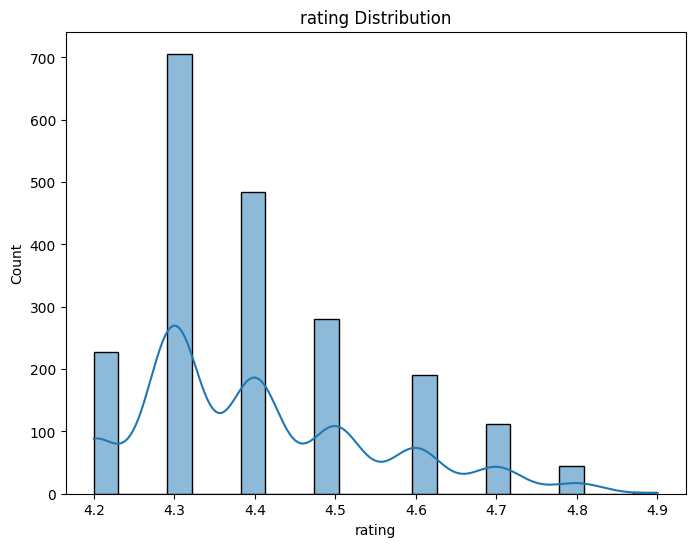

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(df_wine['rating'], kde=True)
plt.title('rating Distribution')
plt.xlabel('rating')
plt.ylabel('Count')
plt.show()

Outliers: 4.8

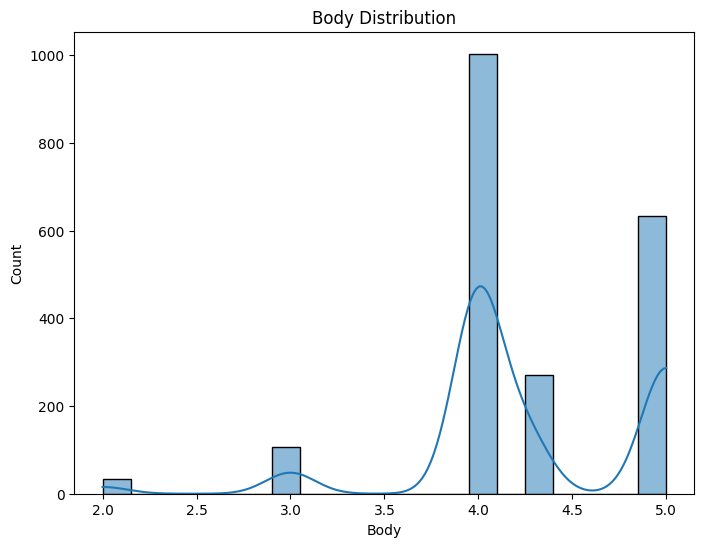

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(df_wine['body'], kde=True)
plt.title('Body Distribution')
plt.xlabel('Body')
plt.ylabel('Count')
plt.show()

Outliers: 2.0

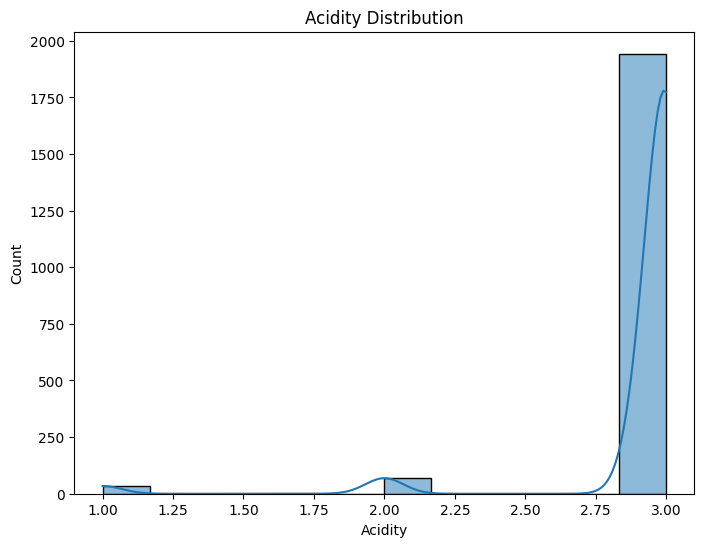

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(df_wine['acidity'], kde=True)
plt.title('Acidity Distribution')
plt.xlabel('Acidity')
plt.ylabel('Count')
plt.show()

Outliers: 1.00

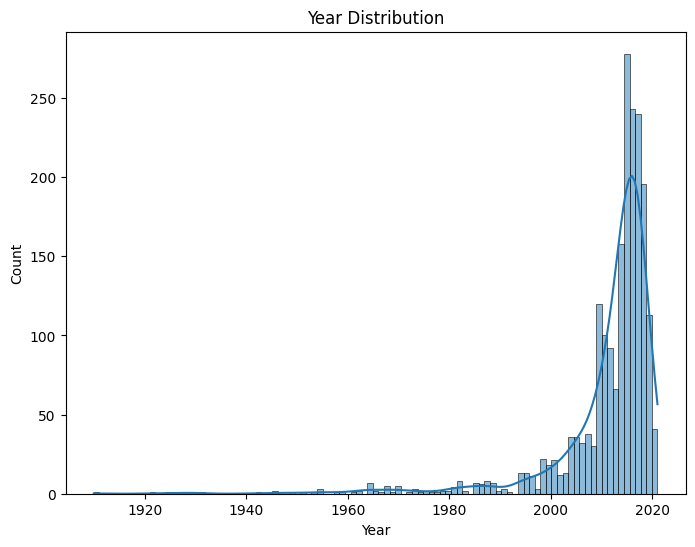

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(df_wine['year'], kde=True)
plt.title('Year Distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

The outliers are

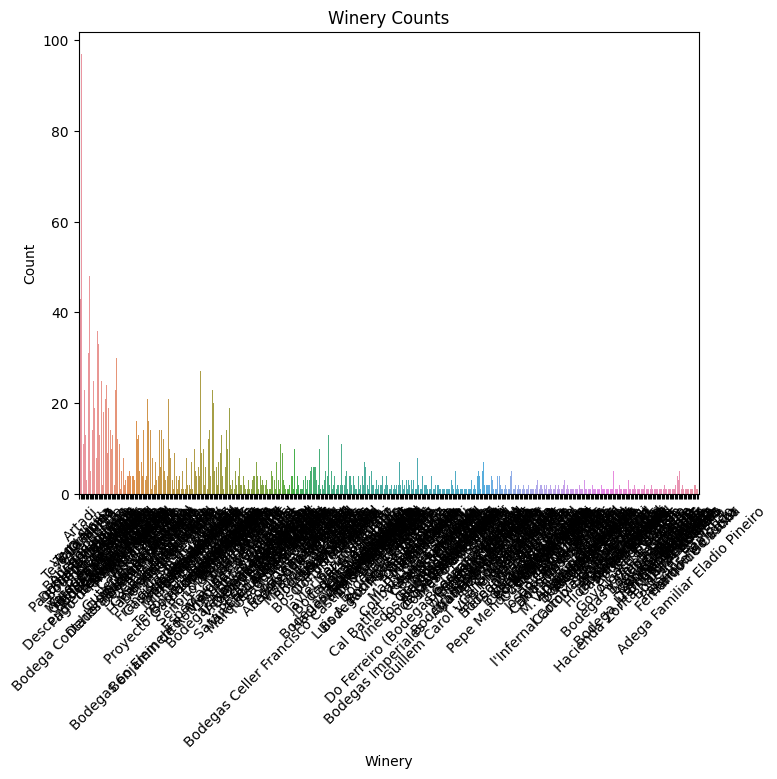

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_wine, x='winery')
plt.title('Winery Counts')
plt.xlabel('Winery')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

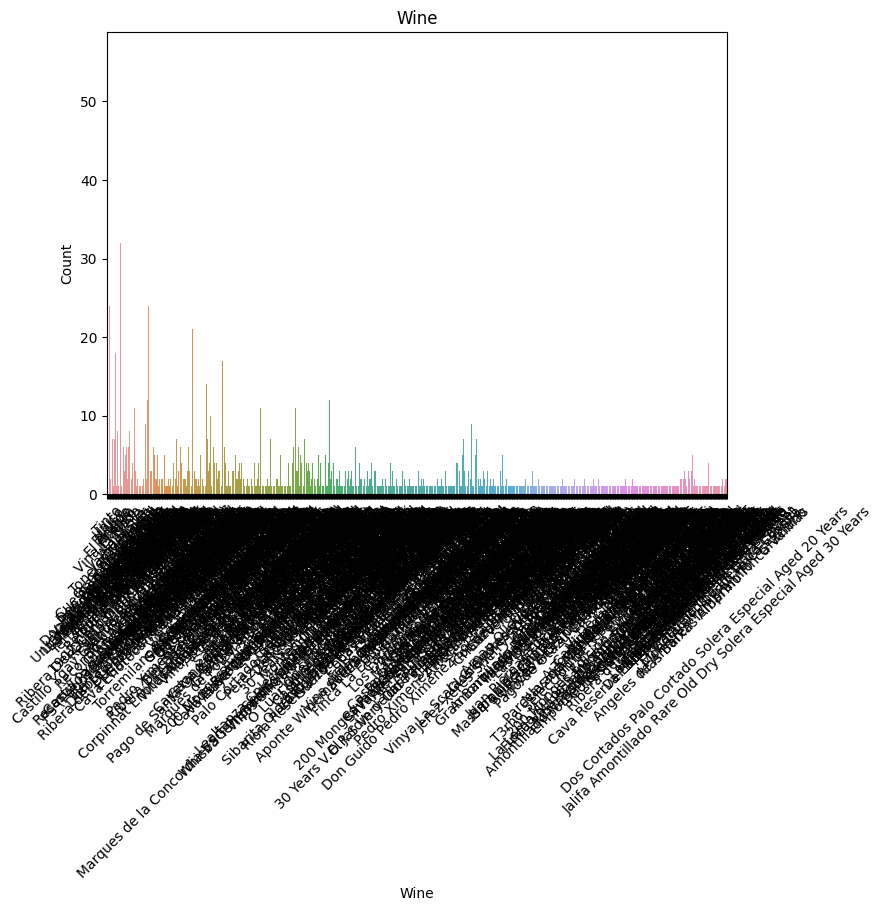

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_wine, x='wine')
plt.title('Wine')
plt.xlabel('Wine')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

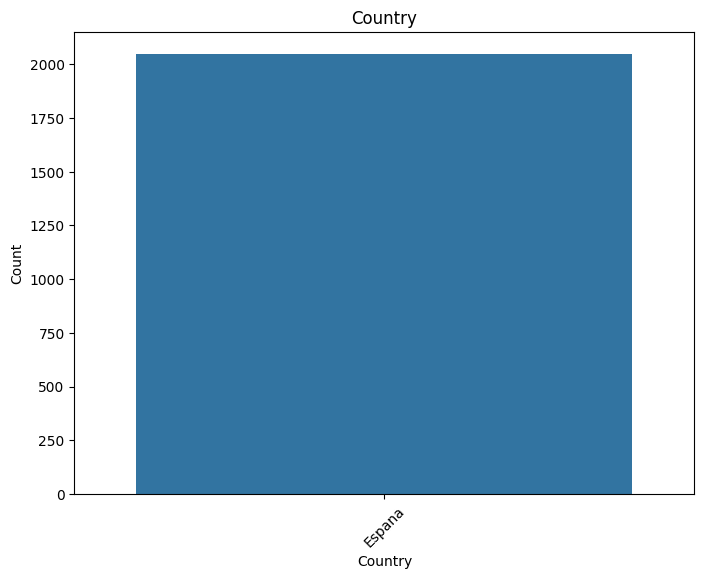

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_wine, x='country')
plt.title('Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Spain is the only country

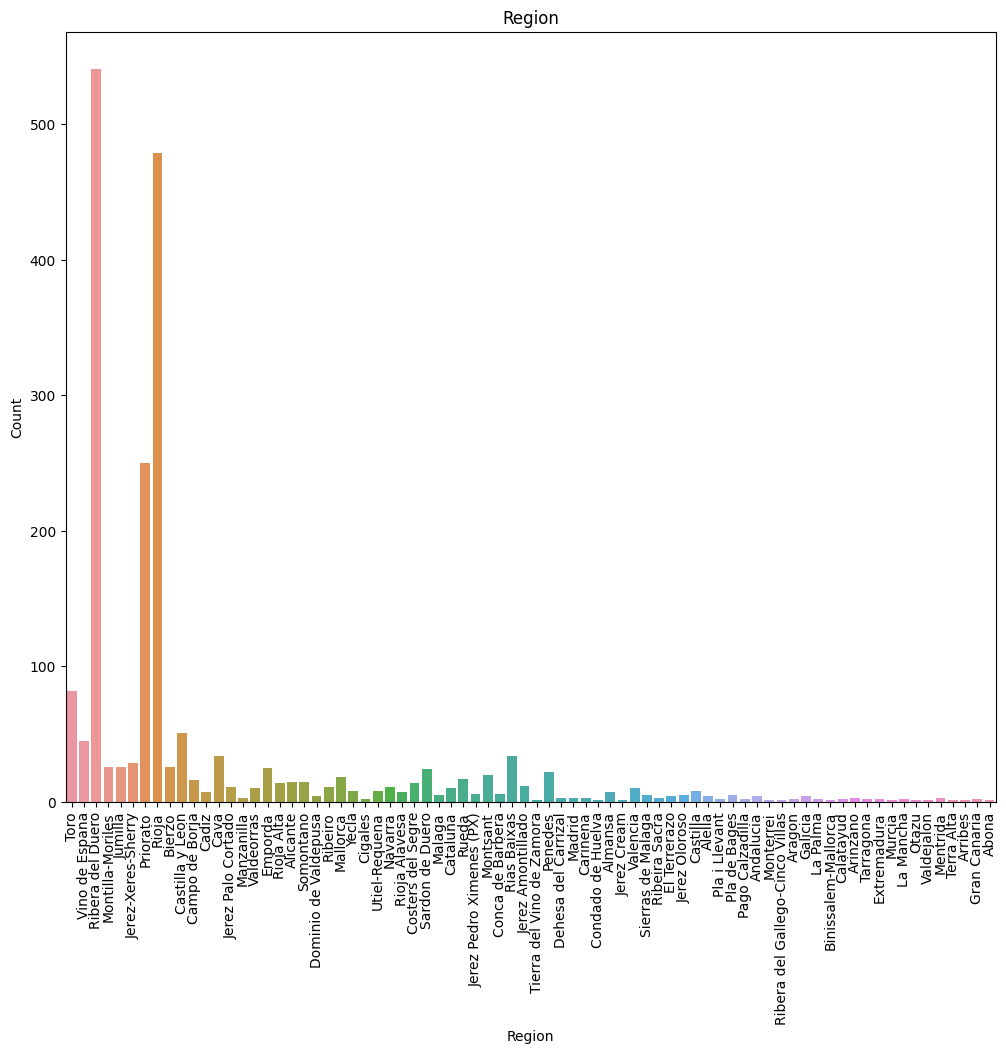

In [23]:
plt.figure(figsize=(12, 10))
sns.countplot(data=df_wine, x='region')
plt.title('Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

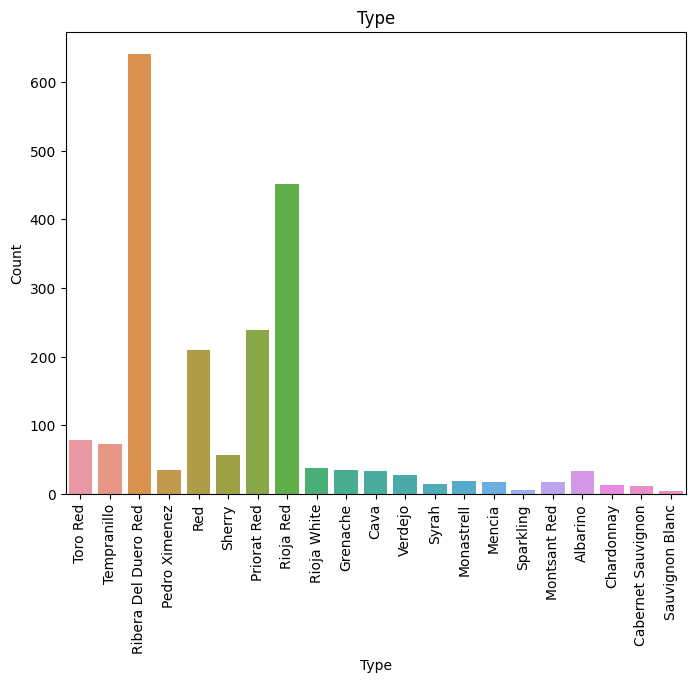

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_wine, x='type')
plt.title('Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Outliers are Sparkling and Sauvignon Blanc

In [25]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='rating', figsize=(6, 4),
                            fillna=True, placeholder='MISSING',
                            order=None):
    """Plots a combination of a seaborn barplot of means combined with
    a seaborn stripplot to show the spread of the data.
    Source:{PASTE IN FINAL LESSON LINK}
    """
    # Make a copy of the dataframe and fillna
    temp_df = df.copy()
    # fillna with placeholder
    if fillna:
        temp_df[x] = temp_df[x].fillna(placeholder)

    # or drop nulls prevent unwanted 'nan' group in stripplot
    else:
        temp_df = temp_df.dropna(subset=[x])
    # Create the figure and subplots
    fig, ax = plt.subplots(figsize=figsize)

    # Barplot
    sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
                linewidth=1, edgecolor='black', errorbar=None)

    # Boxplot
    sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                  order=order, hue_order=order, legend=False,
                  edgecolor='white', linewidth=0.5,
                  size=3, zorder=0)
    # Rotate xlabels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Add a title
    ax.set_title(f"{x} vs. {y}", fontweight='bold')
    fig.tight_layout()
    return fig, ax


def plot_numeric_vs_target(df, x, y='rating', figsize=(6, 4)):
    """Plots a seaborn regplot with Pearson's correlation (r) added
    to the title.
    Source:{PASTE IN FINAL LESSON LINK}
    """
    # Calculate the correlation
    corr = df[[x, y]].corr().round(2)
    r = corr.loc[x, y]

    # Plot the data
    fig, ax = plt.subplots(figsize=figsize)
    scatter_kws = {'ec': 'white', 'lw': 1, 'alpha': 0.8}
    sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

    ## Add the title with the correlation
    ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

    # Make sure the plot is shown before the print statement
    plt.show()

    return fig, ax

In [26]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 6100
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       2048 non-null   object 
 1   wine         2048 non-null   object 
 2   year         2048 non-null   int64  
 3   rating       2048 non-null   float64
 4   num_reviews  2048 non-null   int64  
 5   country      2048 non-null   object 
 6   region       2048 non-null   object 
 7   price        2048 non-null   float64
 8   type         2048 non-null   object 
 9   body         2048 non-null   float64
 10  acidity      2048 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 192.0+ KB


In [27]:
feature = "winery"

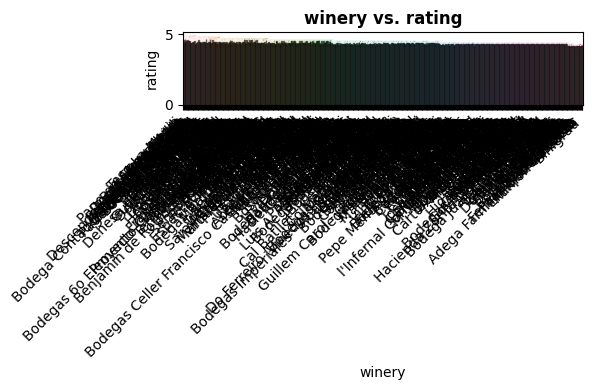

In [28]:
plot_categorical_vs_target(df_wine ,feature, 'rating');

In [29]:
feature = 'year'

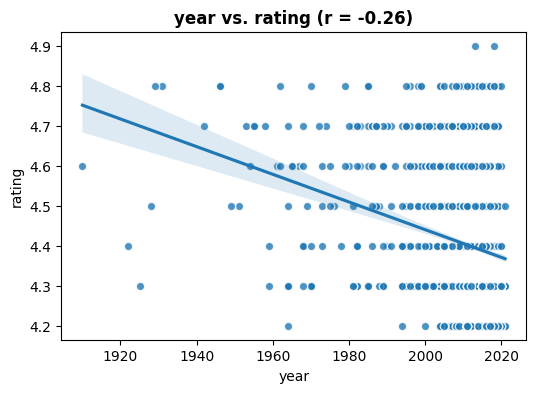

In [30]:
plot_numeric_vs_target(df_wine ,feature, 'rating');

In [31]:
feature = 'num_reviews'

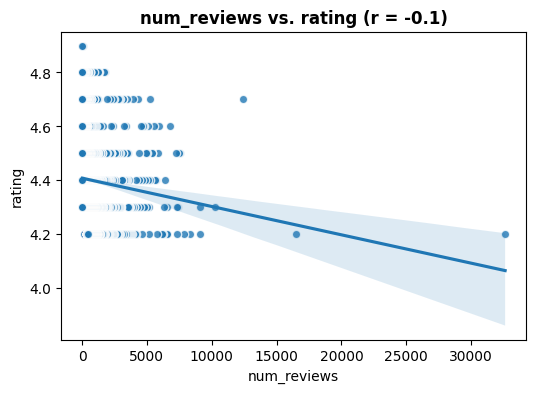

In [32]:
plot_numeric_vs_target(df_wine ,feature, 'rating');

In [33]:
feature = 'country'

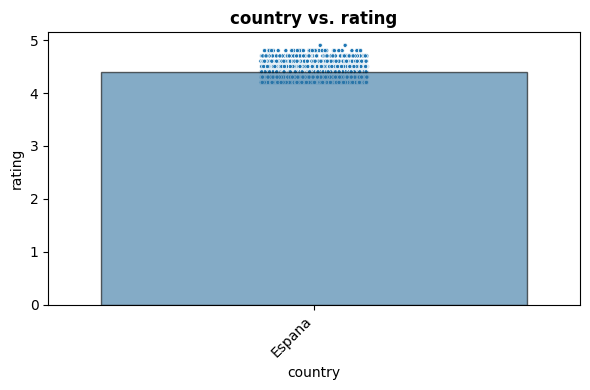

In [34]:
plot_categorical_vs_target(df_wine ,feature, 'rating');

In [35]:
feature = 'region'

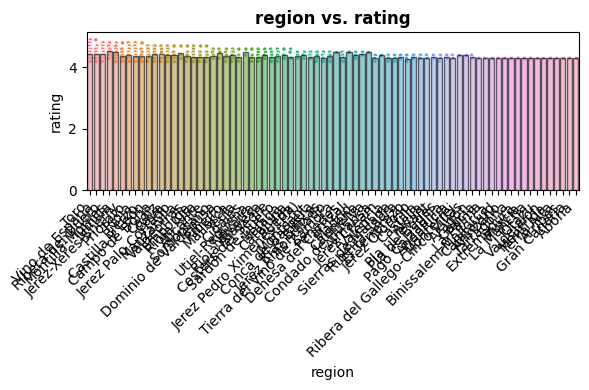

In [36]:
plot_categorical_vs_target(df_wine ,feature, 'rating');

In [37]:
feature = 'price'

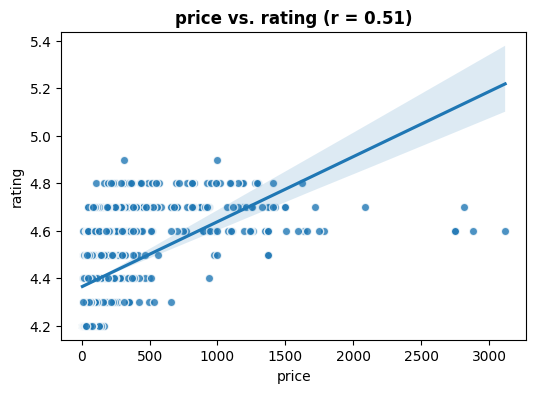

In [38]:
plot_numeric_vs_target(df_wine ,feature, 'rating');

In [39]:
feature = 'type'

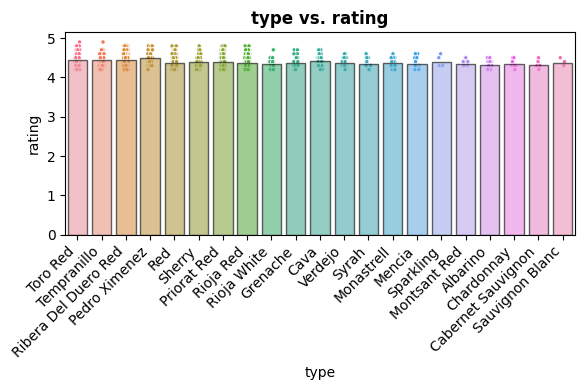

In [40]:
plot_categorical_vs_target(df_wine ,feature, 'rating');

In [41]:
feature = 'body'

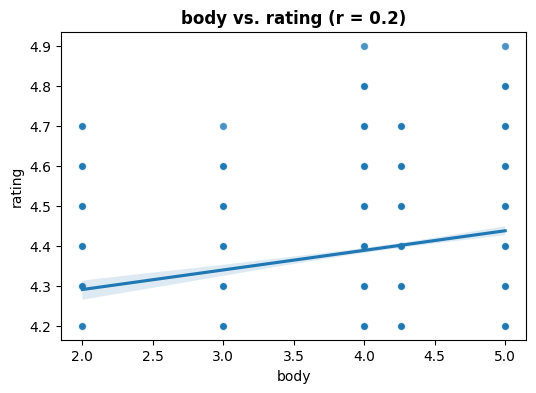

In [42]:
plot_numeric_vs_target(df_wine ,feature, 'rating');

In [43]:
feature = 'acidity'

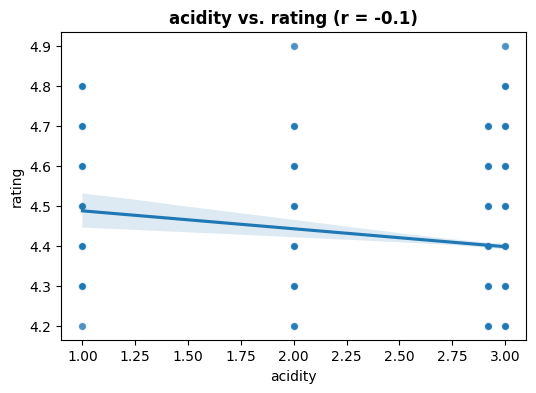

In [44]:
plot_numeric_vs_target(df_wine ,feature, 'rating');

In [46]:
correlation_matrix = df_wine.corr()

<ipython-input-46-0ae779925080>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_wine.corr()


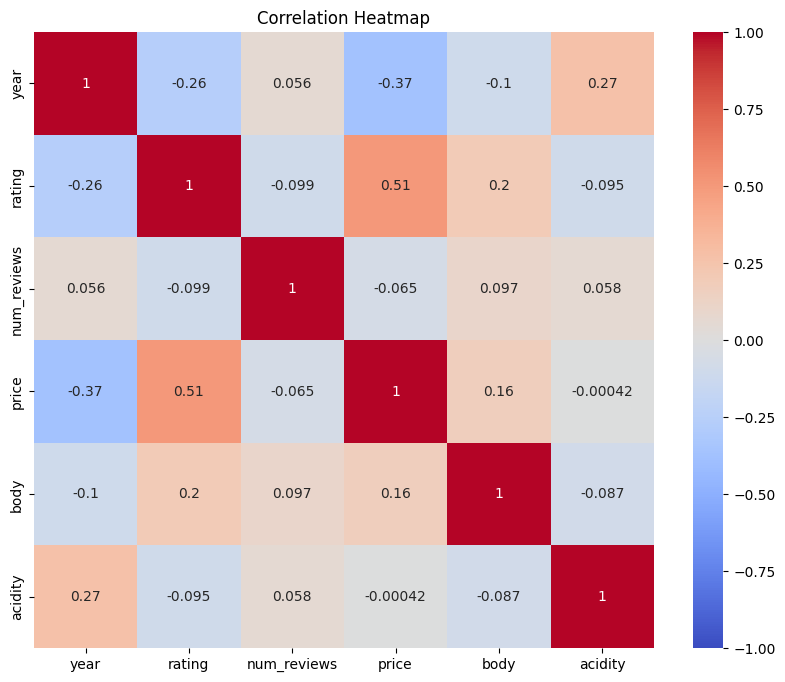

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

The two graphs that have a trend are Price and Year. The higher the price does not entirely correlate to the rating being lower but it did have an effect on the extremely expensive bottles because I believe the people rated the bottle so high because of the price tag. With year we had more data on newer bottles but the older bottles did not do that well in rating leading me to believe that the bottles could have gone bad and could have lost its flavor.

I am going to use the type vs rating bar chart and the price vs rating chart.